In [ ]:
#We will be using keras and Tensorflow > 2.0

In [8]:
pip install pandas-datareader

Note: you may need to restart the kernel to use updated packages.


In [9]:
import pandas_datareader as pdr

In [10]:
# Here I'm hiding my key 
df=pdr.get_data_tiingo('AAPL',api_key=key)

C:\Users\gudib\AppData\Local\Temp\ipykernel_3096\40330262.py:2: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df=pdr.get_data_tiingo('AAPL',api_key=key)


In [11]:
df.to_csv('AAPL.csv')

In [12]:
import pandas as pd

In [13]:
df=pd.read_csv('D://BharatIntern//AAPL.csv')

In [16]:
df.tail()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,1253,AAPL,2020-05-18 00:00:00+00:00,314.96,316.50,310.3241,313.17,33843125,314.96,316.50,310.3241,313.17,33843125,0.0,1.0
1254,1254,AAPL,2020-05-19 00:00:00+00:00,313.14,318.52,313.0100,315.03,25432385,313.14,318.52,313.0100,315.03,25432385,0.0,1.0
1255,1255,AAPL,2020-05-20 00:00:00+00:00,319.23,319.52,316.2000,316.68,27876215,319.23,319.52,316.2000,316.68,27876215,0.0,1.0
1256,1256,AAPL,2020-05-21 00:00:00+00:00,316.85,320.89,315.8700,318.66,25672211,316.85,320.89,315.8700,318.66,25672211,0.0,1.0
1257,1257,AAPL,2020-05-22 00:00:00+00:00,318.89,319.23,315.3500,315.77,20450754,318.89,319.23,315.3500,315.77,20450754,0.0,1.0


In [19]:
df1=df.reset_index()['close']

In [20]:
df1.shape

(1258,)

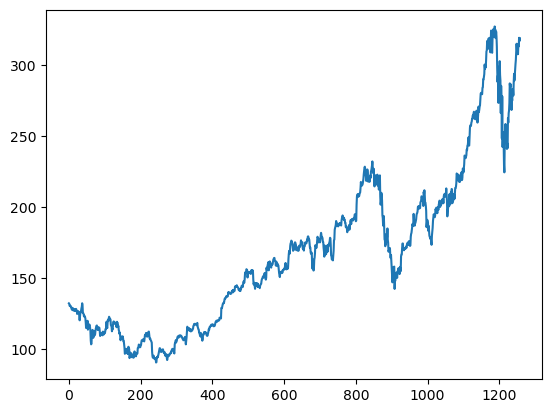

In [21]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [ ]:
# LSTM are sensitive to the scale of the data.so we apply MinMax scalar

In [22]:
import numpy as np

In [23]:
df1

0       132.045
1       131.780
2       130.280
3       130.535
4       129.960
         ...   
1253    314.960
1254    313.140
1255    319.230
1256    316.850
1257    318.890
Name: close, Length: 1258, dtype: float64

In [29]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [30]:
df1

array([[0.17607447],
       [0.17495567],
       [0.16862282],
       ...,
       [0.96635143],
       [0.9563033 ],
       [0.96491598]])

In [31]:
# splitting dataset into train and test
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [32]:
training_size,test_size

(817, 441)

In [33]:
train_data

array([[0.17607447],
       [0.17495567],
       [0.16862282],
       [0.1696994 ],
       [0.16727181],
       [0.16794731],
       [0.16473866],
       [0.16174111],
       [0.1581525 ],
       [0.15654817],
       [0.16271215],
       [0.1614878 ],
       [0.1554927 ],
       [0.15443722],
       [0.15730811],
       [0.15604154],
       [0.15849025],
       [0.15308621],
       [0.15735033],
       [0.15490163],
       [0.15946129],
       [0.15688592],
       [0.1537195 ],
       [0.14434687],
       [0.14812547],
       [0.15308621],
       [0.15241071],
       [0.15055307],
       [0.14924428],
       [0.13607194],
       [0.12551718],
       [0.13906949],
       [0.14911762],
       [0.14890653],
       [0.15401503],
       [0.16115005],
       [0.16583636],
       [0.17618002],
       [0.17060711],
       [0.14725998],
       [0.14700667],
       [0.14422021],
       [0.13691632],
       [0.13949168],
       [0.13784514],
       [0.13522756],
       [0.13071012],
       [0.118

In [34]:
import numpy
# converting array of values into a dataset matrix
def create_dataset(dataset,time_step=1):
    dataX,dataY=[],[]
    for i in range(len(dataset)-time_step-1):
        a=dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return numpy.array(dataX),numpy.array(dataY)

In [39]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step=100
X_train,y_train=create_dataset(train_data,time_step)
X_test,y_test=create_dataset(test_data,time_step)

In [40]:
print(X_train.shape,y_train.shape)

(716, 100) (716,)


In [41]:
print(X_test.shape,y_test.shape)

(340, 100) (340,)


In [42]:
# reshape input to be [samples,time stamps,features] which is required for LSTM
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [43]:
# creating stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [44]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [45]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [57]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 1s 116ms/step - loss: 1.9684e-04 - val_loss: 0.0017
Epoch 2/100
12/12 [==============================] - 1s 113ms/step - loss: 2.2670e-04 - val_loss: 0.0014
Epoch 3/100
12/12 [==============================] - 1s 113ms/step - loss: 1.9482e-04 - val_loss: 0.0013
Epoch 4/100
12/12 [==============================] - 1s 114ms/step - loss: 2.2383e-04 - val_loss: 0.0014
Epoch 5/100
12/12 [==============================] - 1s 114ms/step - loss: 2.3849e-04 - val_loss: 0.0015
Epoch 6/100
12/12 [==============================] - 1s 122ms/step - loss: 1.9098e-04 - val_loss: 0.0012
Epoch 7/100
12/12 [==============================] - 1s 118ms/step - loss: 2.0769e-04 - val_loss: 0.0015
Epoch 8/100
12/12 [==============================] - 1s 118ms/step - loss: 2.2520e-04 - val_loss: 0.0012
Epoch 9/100
12/12 [==============================] - 1s 118ms/step - loss: 1.8015e-04 - val_loss: 0.0016
Epoch 10/100
12/12 [==============================] - 2

In [47]:
import tensorflow as tf

In [48]:
tf.__version__

'2.13.0'

In [58]:
## Let us predict and check the performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

11/11 [==============================] - 0s 24ms/step


In [59]:
## Transform back to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [60]:
## calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

143.93387735127894

In [61]:
## Test data RMSE performance metrics
math.sqrt(mean_squared_error(y_test,test_predict))

239.6736516197745

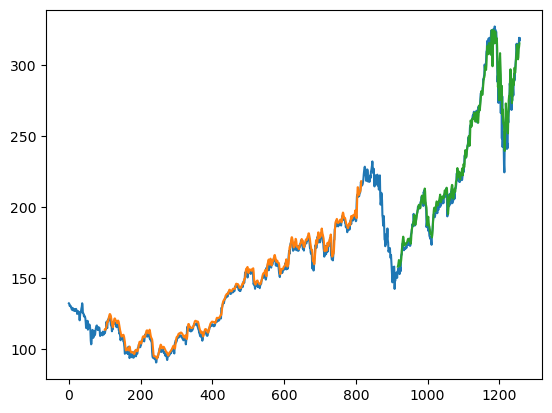

In [62]:
## Plotting
# shift train predictions for plotting
look_back=100
trainPredictPlot=numpy.empty_like(df1)
trainPredictPlot[:, :]=np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :]=train_predict
# shift test predictions for plotting
testPredictPlot=numpy.empty_like(df1)
testPredictPlot[:, :]=numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :]=test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [63]:
x_input=test_data[341:].reshape(-1,1)
x_input.shape

(100, 1)

In [65]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [68]:
# demonstrating prediction for next 10 days
from numpy import array
lst_output=[]
n_steps=100
i=0
while(i<30):
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
print(lst_output)

[0.9509649]
32
[0.9509649]
33
[0.9509649]
34
[0.9509649]
35
[0.9509649]
36
[0.9509649]
37
[0.9509649]
38
[0.9509649]
39
[0.9509649]
40
[0.9509649]
41
[0.9509649]
42
[0.9509649]
43
[0.9509649]
44
[0.9509649]
45
[0.9509649]
46
[0.9509649]
47
[0.9509649]
48
[0.9509649]
49
[0.9509649]
50
[0.9509649]
51
[0.9509649]
52
[0.9509649]
53
[0.9509649]
54
[0.9509649]
55
[0.9509649]
56
[0.9509649]
57
[0.9509649]
58
[0.9509649]
59
[0.9509649]
60
[0.9509649]
61
[[0.9509649276733398], [0.9509649276733398], [0.9509649276733398], [0.9509649276733398], [0.9509649276733398], [0.9509649276733398], [0.9509649276733398], [0.9509649276733398], [0.9509649276733398], [0.9509649276733398], [0.9509649276733398], [0.9509649276733398], [0.9509649276733398], [0.9509649276733398], [0.9509649276733398], [0.9509649276733398], [0.9509649276733398], [0.9509649276733398], [0.9509649276733398], [0.9509649276733398], [0.9509649276733398], [0.9509649276733398], [0.9509649276733398], [0.9509649276733398], [0.9509649276733398],

In [70]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [71]:
import matplotlib.pyplot as plt

In [72]:
len(df1)

1258

In [75]:
df3=df1.tolist()
df3.extend(lst_output)

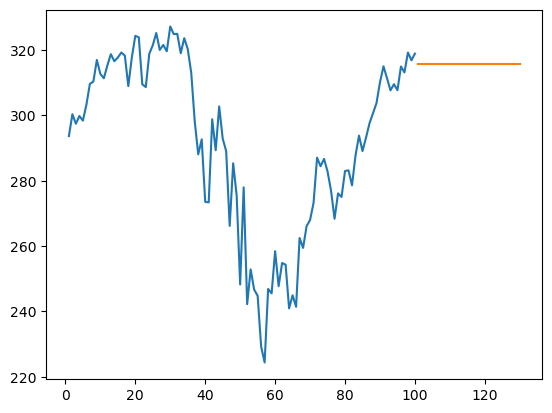

In [77]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

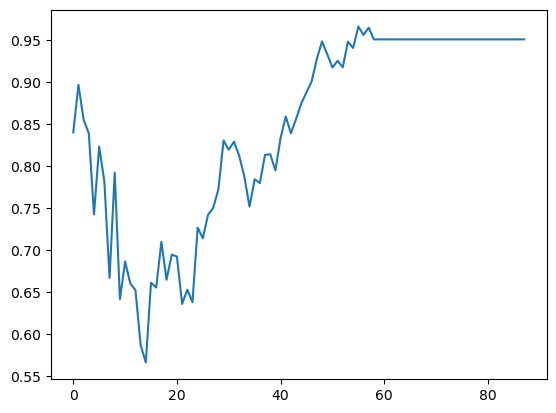

In [78]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [79]:
df3=scaler.inverse_transform(df3).tolist()

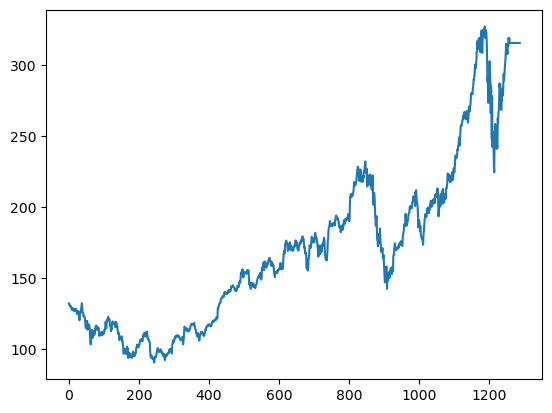

In [80]:
plt.plot(df3)